In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pydatautils.utils.notebook_utils import Utils
Utils.fix_to_pandas()

In [4]:
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
dataset['MEDV'] = boston_dataset.target
dataset.pprint()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [5]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)

In [6]:
dataset.iloc[:, 13].describe(np.linspace(0.01, 1, 20))

count                506.000
mean                  22.533
std                    9.197
min                    5.000
1%                     7.010
6.2%                  10.836
11.4%                 13.268
16.6%                 14.400
21.8%                 16.030
27.1%                 17.462
32.3%                 18.600
37.5%                 19.400
42.7%                 20.100
47.9%                 20.800
50%                   21.200
53.1%                 21.700
58.3%                 22.500
63.5%                 23.100
68.7%                 23.900
73.9%                 24.887
79.2%                 27.799
84.4%                 30.512
89.6%                 34.099
94.8%                 43.006
100%                  50.000
max                   50.000
Name: MEDV, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

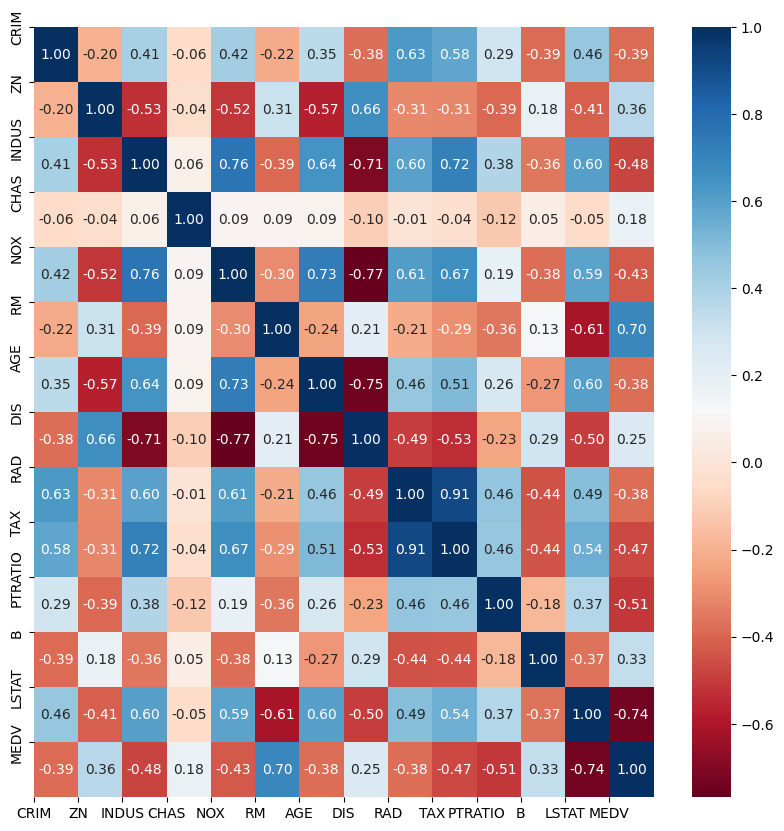

In [10]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6984854476156039
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710356
RMSE:  4.647279745724208


In [14]:
Y_train_pred = regressor_linear.predict(X_train)
Y_test_pred = regressor_linear.predict(X_test)
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 22.64
El error cuadrático medio en test es: 21.6


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [16]:
np.set_printoptions(suppress=True)

In [17]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6984854476156039
R2_score (train):  0.9306558486351397
R2_score (test):  0.7665134369037339
RMSE:  4.194313207514256


In [18]:
Y_train_pred = regressor_poly2.predict(poly_reg.fit_transform(X_train))
Y_test_pred = regressor_poly2.predict(poly_reg.fit_transform(X_test))
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 6.12
El error cuadrático medio en test es: 17.59


In [19]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [20]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [21]:
# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7635629962138688
R2_score (train):  0.9228176586388414
R2_score (test):  0.8919654552985887
RMSE:  2.8530621664437597


In [22]:
Y_train_pred = ridge_pipe.predict(X_train)
Y_test_pred = ridge_pipe.predict(X_test)
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 6.82
El error cuadrático medio en test es: 8.14


In [23]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [24]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7505443182491558
R2_score (train):  0.9234017201921203
R2_score (test):  0.8950938075525039
RMSE:  2.8114507112289018


In [25]:
Y_train_pred = lasso_pipe.predict(X_train)
Y_test_pred = lasso_pipe.predict(X_test)
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 6.76
El error cuadrático medio en test es: 7.9


In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [26]:
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)).reshape(-1,1))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.782600693247584
R2_score (train):  0.8742715669147498
R2_score (test):  0.8044070157723574
RMSE:  3.8388977809328355


In [27]:
Y_train_pred = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)).reshape(-1,1))
Y_test_pred = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 11.1
El error cuadrático medio en test es: 14.74


In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [52]:
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8182509664876496
R2_score (train):  0.9768407108850092
R2_score (test):  0.8637486208767902
RMSE:  3.204057971213175


In [53]:
Y_train_pred = regressor_rf.predict(X_train)
Y_test_pred = regressor_rf.predict(X_test)
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 2.05
El error cuadrático medio en test es: 10.27


In [54]:
from xgboost import XGBRegressor, XGBRFRegressor
regressor_xgbrf = XGBRFRegressor(n_estimators = 500, random_state = 0)
regressor_xgbrf.fit(X_train, y_train.ravel())

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=0, num_parallel_tree=500,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [55]:
cv_xrf = cross_val_score(estimator = regressor_xgbrf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_xrf_train = regressor_xgbrf.predict(X_train)
r2_score_xrf_train = r2_score(y_train, y_pred_xrf_train)

# Predicting R2 Score the Test set results
y_pred_xrf_test = regressor_xgbrf.predict(X_test)
r2_score_xrf_test = r2_score(y_test, y_pred_xrf_test)

# Predicting RMSE the Test set results
rmse_xrf = (np.sqrt(mean_squared_error(y_test, y_pred_xrf_test)))
print('CV: ', cv_xrf.mean())
print('R2_score (train): ', r2_score_xrf_train)
print('R2_score (test): ', r2_score_xrf_test)
print("RMSE: ", rmse_xrf)

CV:  0.803441514240507
R2_score (train):  0.9649543235071432
R2_score (test):  0.8737034917941522
RMSE:  3.084789852015143


In [56]:
Y_train_pred = regressor_xgbrf.predict(X_train)
Y_test_pred = regressor_xgbrf.predict(X_test)
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 3.09
El error cuadrático medio en test es: 9.52


In [57]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_scaled = sc_X.fit_transform(X_train)
# y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))
# regressor_xgbrf = XGBRFRegressor(n_estimators = 500, random_state = 0)
# regressor_xgbrf.fit(X_scaled, y_scaled.ravel())
# Y_train_pred = sc_y.inverse_transform(regressor_xgbrf.predict(sc_X.transform(X_train)).reshape(-1,1))
# Y_test_pred = sc_y.inverse_transform(regressor_xgbrf.predict(sc_X.transform(X_test)).reshape(-1,1))
# error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
# error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
# print("El error cuadrático medio en train es: {}".format(error_mse_train))
# print("El error cuadrático medio en test es: {}".format(error_mse_test))

In [68]:
pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/ncortes/miniconda3/envs/py310/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [96]:
def constructor_modelo():
    # Definición del modelo
    modelo = keras.Sequential(
        [
            layers.Dense(64, activation="relu", input_shape=[X_train.shape[1]]),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )

    # Definición del optimizador
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Compilación del modelo
    modelo.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return modelo
# Muestro un punto por cada una de las épocas completadas
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("")
        print(".", end="")

model = constructor_modelo()
EPOCHS = 1000
historico = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    validation_split=0.1,
    verbose=0,
    callbacks=[PrintDot()],
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [97]:
# cv_kr = cross_val_score(estimator = model, X = X_train, y = y_train.ravel(), cv = 10)
cv_kr = np.array([0.5,0.5])

# Predicting R2 Score the Train set results
y_pred_kr_train = model.predict(X_train)
r2_score_kr_train = r2_score(y_train, y_pred_kr_train)

# Predicting R2 Score the Test set results
y_pred_kr_test = model.predict(X_test)
r2_score_kr_test = r2_score(y_test, y_pred_kr_test)

# Predicting RMSE the Test set results
rmse_kr = (np.sqrt(mean_squared_error(y_test, y_pred_kr_test)))
print('CV: ', cv_kr.mean())
print('R2_score (train): ', r2_score_kr_train)
print('R2_score (test): ', r2_score_kr_test)
print("RMSE: ", rmse_kr)

5/5 [==============================] - 0s 1ms/step
CV:  0.5
R2_score (train):  0.918319787590627
R2_score (test):  0.7807375760475368
RMSE:  4.064545758987619


In [98]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

5/5 [==============================] - 0s 1ms/step
El error cuadrático medio en train es: 7.21
El error cuadrático medio en test es: 16.52


In [114]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [123]:
model = constructor_modelo()
EPOCHS = 1000
historico = model.fit(
    X_scaled,
    y_scaled,
    epochs=EPOCHS,
    validation_split=0.02,
    verbose=0,
    callbacks=[PrintDot()],
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [124]:
# cv_kr = cross_val_score(estimator = model, X = X_train, y = y_train.ravel(), cv = 10)
cv_kr = np.array([0.5,0.5])

# Predicting R2 Score the Train set results
y_pred_kr_train = sc_y.inverse_transform(model.predict(sc_X.transform(X_train)).reshape(-1,1))
r2_score_kr_train = r2_score(y_train, y_pred_kr_train)

# Predicting R2 Score the Test set results
y_pred_kr_test = sc_y.inverse_transform(model.predict(sc_X.transform(X_test)).reshape(-1,1))
r2_score_kr_test = r2_score(y_test, y_pred_kr_test)

# Predicting RMSE the Test set results
rmse_kr = (np.sqrt(mean_squared_error(y_test, y_pred_kr_test)))
print('CV: ', cv_kr.mean())
print('R2_score (train): ', r2_score_kr_train)
print('R2_score (test): ', r2_score_kr_test)
print("RMSE: ", rmse_kr)

5/5 [==============================] - 0s 2ms/step
CV:  0.5
R2_score (train):  0.9961950367364639
R2_score (test):  0.8889706117585788
RMSE:  2.8923369462610875


In [125]:
Y_train_pred = sc_y.inverse_transform(model.predict(sc_X.transform(X_train)).reshape(-1,1))
Y_test_pred = sc_y.inverse_transform(model.predict(sc_X.transform(X_test)).reshape(-1,1))
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

5/5 [==============================] - 0s 1ms/step
El error cuadrático medio en train es: 0.34
El error cuadrático medio en test es: 8.37


In [126]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),          
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('XGBRFRegressor', rmse_xrf, r2_score_xrf_train, r2_score_xrf_test, cv_xrf.mean()),  
          ('Keras', rmse_kr, r2_score_kr_train, r2_score_kr_test, cv_kr.mean()),          
         ]

In [127]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict.pprint2()

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,4.647,0.744,0.713,0.698
1,Polynomial Regression (2nd),4.194,0.931,0.767,0.698
2,Ridge Regression,2.853,0.923,0.892,0.764
3,Lasso Regression,2.811,0.923,0.895,0.751
4,Support Vector Regression,3.839,0.874,0.804,0.783
5,Random Forest Regression,3.204,0.977,0.864,0.818
6,XGBRFRegressor,3.085,0.965,0.874,0.803
7,Keras,2.892,0.996,0.889,0.500


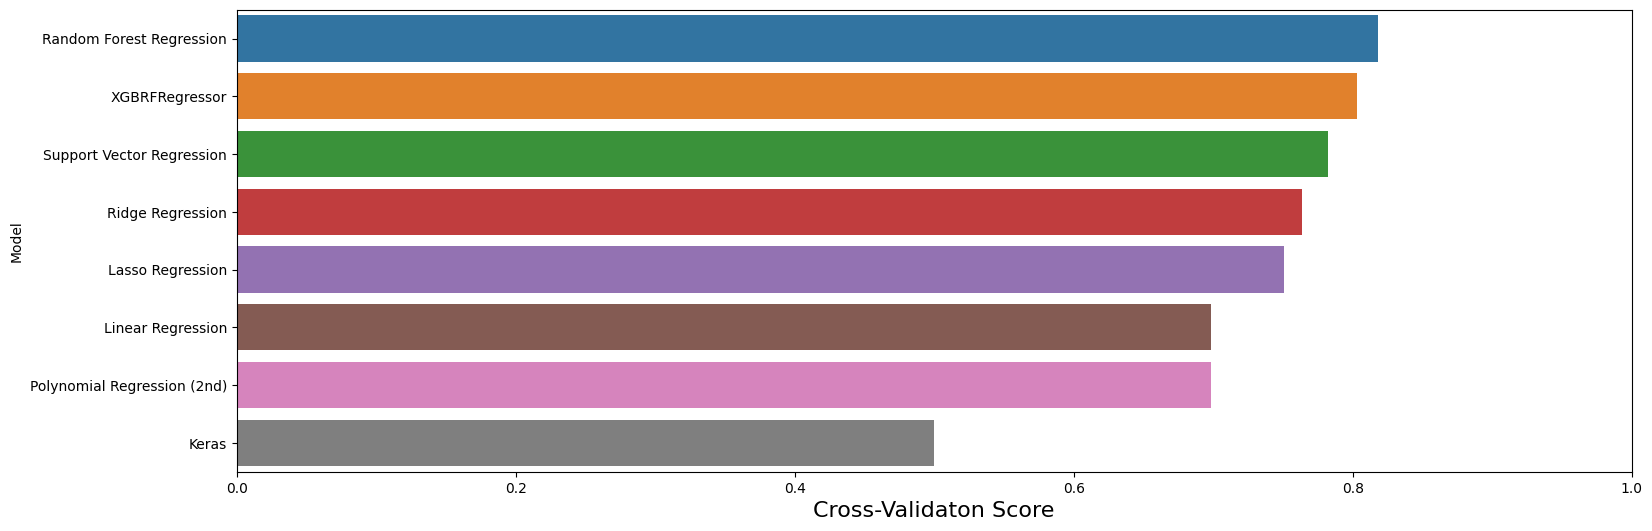

In [128]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

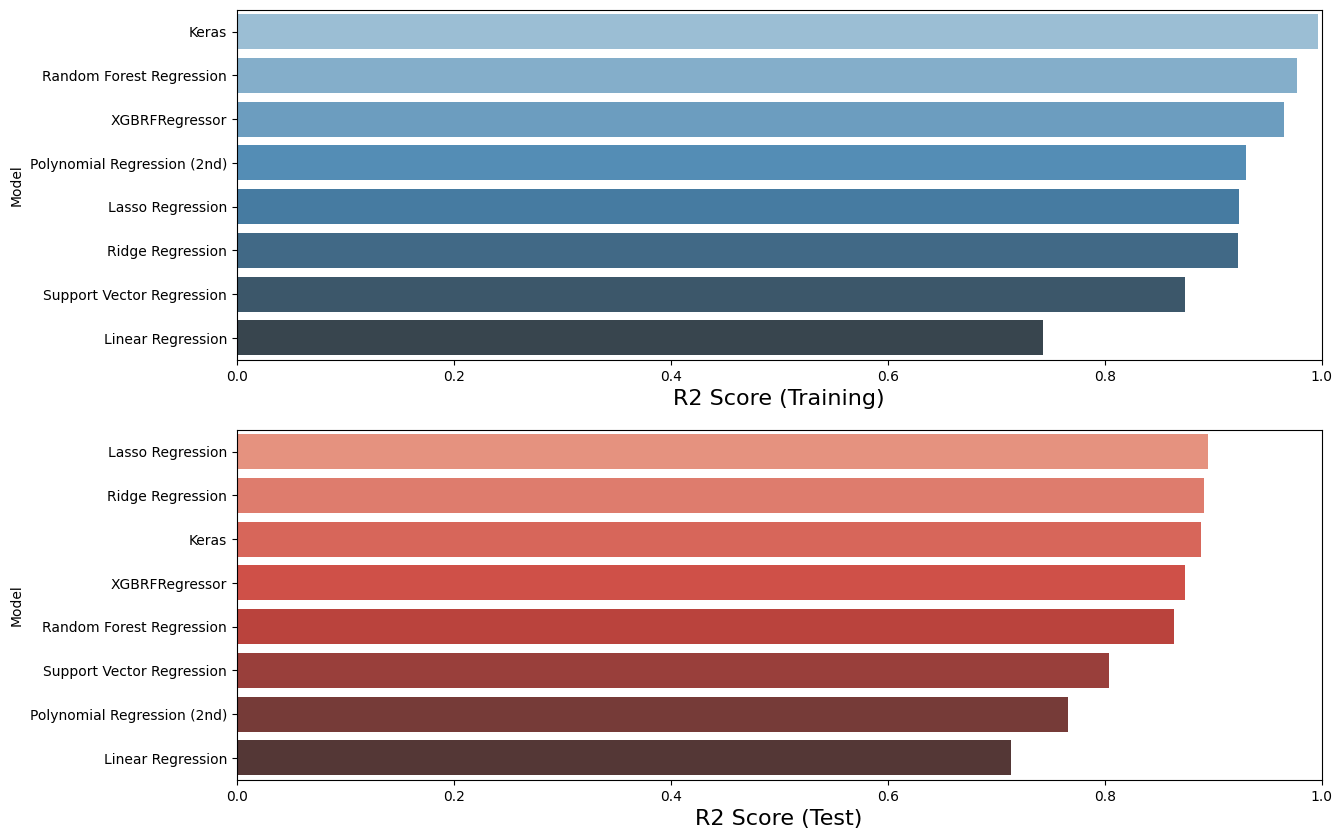

In [129]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

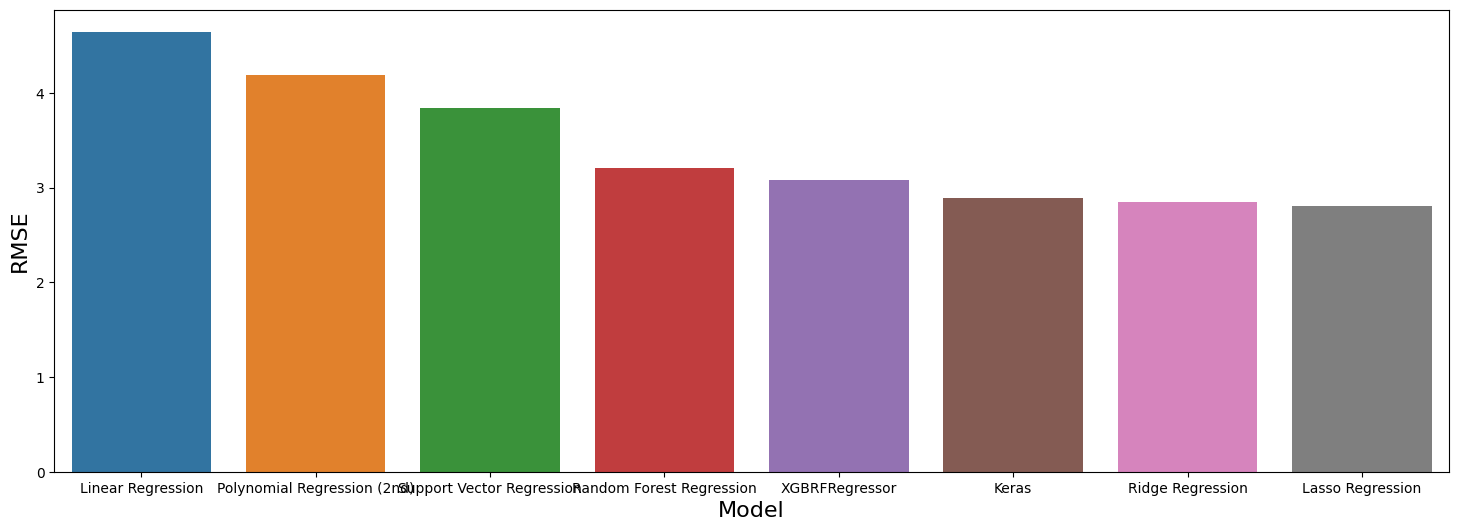

In [130]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

In [8]:
X_train[np.where(y_train == 50, False, True).ravel()]

array([[  0.54011,  20.     ,   3.97   , ...,  13.     , 392.8    ,
          9.59   ],
       [  0.7258 ,   0.     ,   8.14   , ...,  21.     , 390.95   ,
         11.28   ],
       [  1.13081,   0.     ,   8.14   , ...,  21.     , 360.17   ,
         22.6    ],
       ...,
       [  8.05579,   0.     ,  18.1    , ...,  20.2    , 352.58   ,
         18.14   ],
       [  0.40202,   0.     ,   9.9    , ...,  18.4    , 395.21   ,
         10.36   ],
       [  0.59005,   0.     ,  21.89   , ...,  21.2    , 385.76   ,
         11.12   ]])

In [9]:
X_train = X_train[np.where(y_train == 50, False, True).ravel()]
y_train = y_train[np.where(y_train == 50, False, True).ravel()]

In [10]:
X_test[np.where(y_test == 50, True, False).ravel()]

array([[8.26725e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 6.68000e-01,
        5.87500e+00, 8.96000e+01, 1.12960e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.47880e+02, 8.88000e+00],
       [5.66998e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 6.31000e-01,
        6.68300e+00, 9.68000e+01, 1.35670e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75330e+02, 3.73000e+00],
       [1.83377e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00, 6.05000e-01,
        7.80200e+00, 9.82000e+01, 2.04070e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.89610e+02, 1.92000e+00],
       [1.46336e+00, 0.00000e+00, 1.95800e+01, 0.00000e+00, 6.05000e-01,
        7.48900e+00, 9.08000e+01, 1.97090e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.74430e+02, 1.73000e+00]])

In [11]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (342, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (342, 1)
Shape of y_test (152, 1)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
_tmp_df = pd.DataFrame(X_train)
_tmp_df.columns = dataset.iloc[:1, 0:13].columns

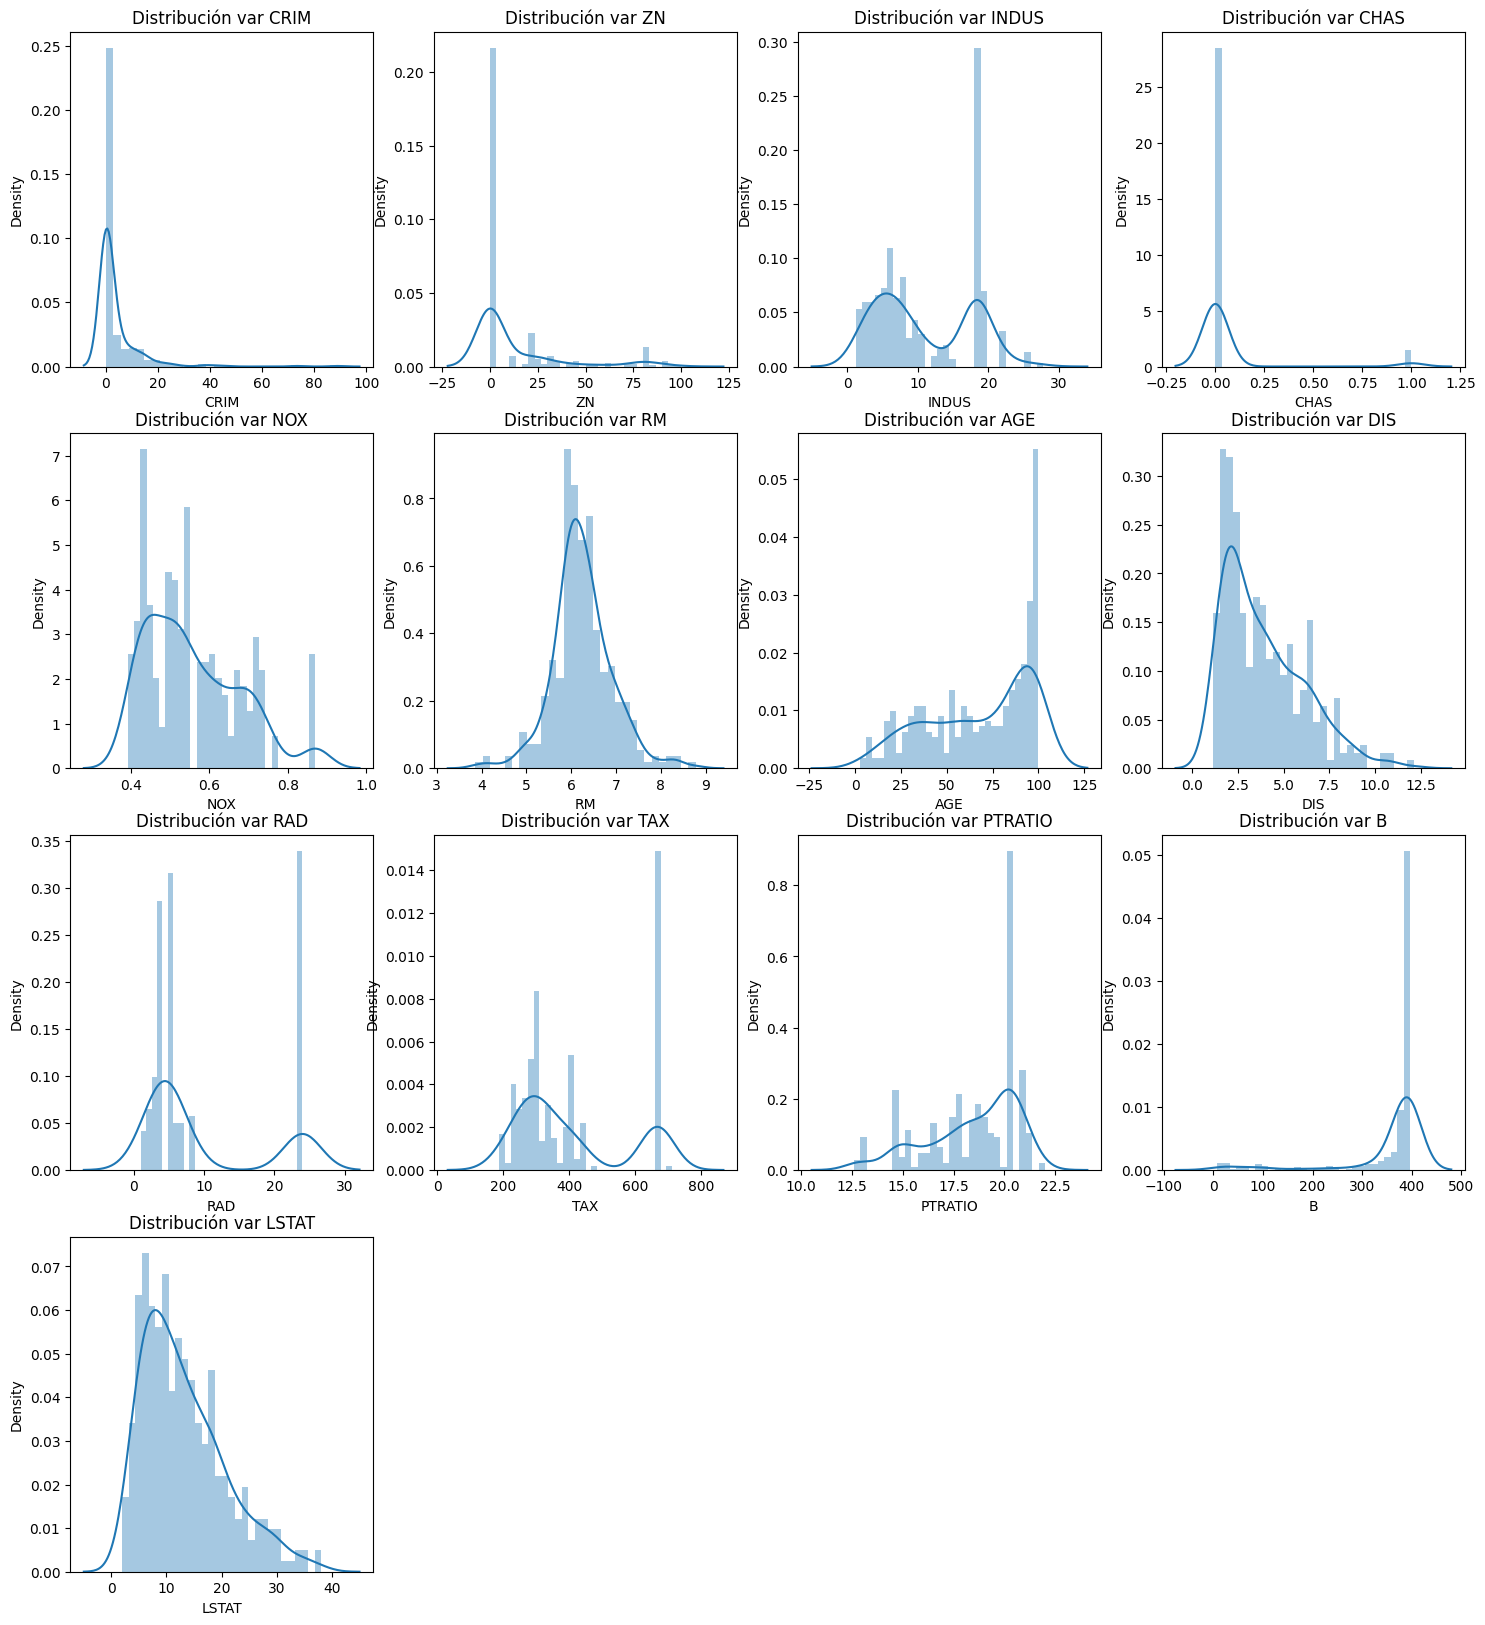

In [16]:
plt.figure(figsize=(18, 20))
for i, column in enumerate(dataset.iloc[:1, 0:13].columns):
    plt.subplot(4, 4, i + 1)    
    sns.distplot(_tmp_df[column], bins=30)
    plt.title("Distribución var {}".format(column))
plt.show()

In [17]:
for k in _tmp_df.columns:
    if (_tmp_df[k].skew()) > 0.5 or (_tmp_df[k].skew()) < -0.5:
        print(k,_tmp_df[k].skew(),'------------> highly skewed')
    else:
        print(k,_tmp_df[k].skew())

CRIM 5.181172382952574 ------------> highly skewed
ZN 2.163659986153752 ------------> highly skewed
INDUS 0.29054673780727275
CHAS 4.161940822491013 ------------> highly skewed
NOX 0.7657491683061598 ------------> highly skewed
RM 0.2704071213492443
AGE -0.5125335478173266 ------------> highly skewed
DIS 0.9843041658085118 ------------> highly skewed
RAD 1.0149546884819585 ------------> highly skewed
TAX 0.7125676092054236 ------------> highly skewed
PTRATIO -0.810985082258573 ------------> highly skewed
B -2.883104887801517 ------------> highly skewed
LSTAT 0.9420191163146413 ------------> highly skewed


In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [21]:
sc_X = MinMaxScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

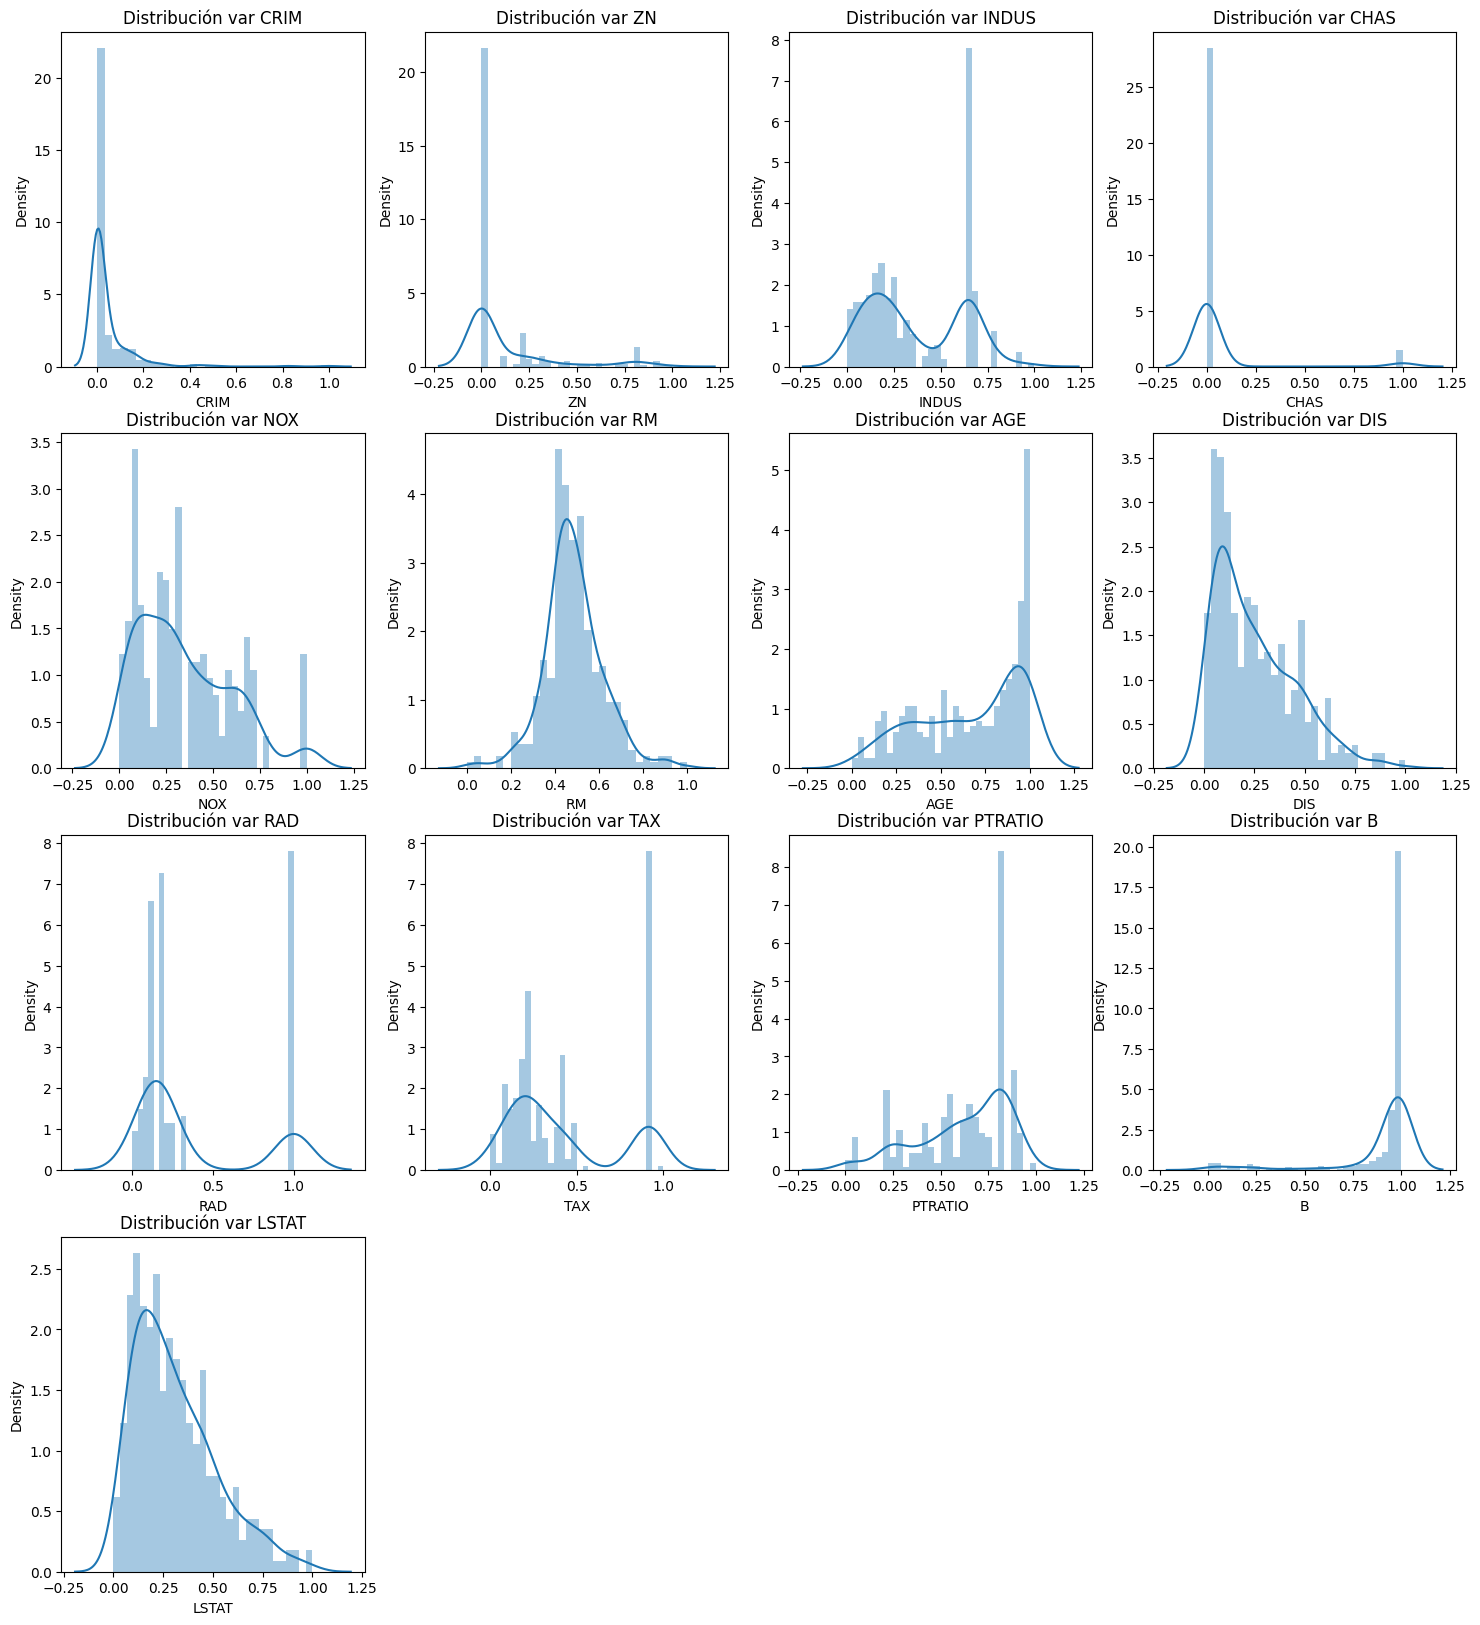

In [22]:
plt.figure(figsize=(18, 20))
_tmp_df = pd.DataFrame(X_scaled)
_tmp_df.columns = dataset.iloc[:1, 0:13].columns
for i, column in enumerate(dataset.iloc[:1, 0:13].columns):
    plt.subplot(4, 4, i + 1)    
    sns.distplot(_tmp_df[column], bins=30)
    plt.title("Distribución var {}".format(column))
plt.show()

In [23]:
for k in _tmp_df.columns:
    if (_tmp_df[k].skew()) > 0.5 or (_tmp_df[k].skew()) < -0.5:
        print(k,_tmp_df[k].skew(),'------------> highly skewed')
    else:
        print(k,_tmp_df[k].skew())

CRIM 5.181172382952572 ------------> highly skewed
ZN 2.163659986153752 ------------> highly skewed
INDUS 0.29054673780727325
CHAS 4.161940822491013 ------------> highly skewed
NOX 0.7657491683061599 ------------> highly skewed
RM 0.27040712134924244
AGE -0.512533547817328 ------------> highly skewed
DIS 0.9843041658085107 ------------> highly skewed
RAD 1.014954688481959 ------------> highly skewed
TAX 0.7125676092054231 ------------> highly skewed
PTRATIO -0.8109850822585741 ------------> highly skewed
B -2.8831048878015175 ------------> highly skewed
LSTAT 0.9420191163146422 ------------> highly skewed


In [141]:
# _tmp_df = pd.DataFrame(X_train)
# _tmp_df.columns = dataset.iloc[:1, 0:13].columns

In [24]:
for k in _tmp_df.columns:
    if (_tmp_df[k].skew()) > 0.5 or (_tmp_df[k].skew()) < -0.5:
        _tmp_df[k] = np.log1p(_tmp_df[k])

In [25]:
for k in _tmp_df.columns:
    if (_tmp_df[k].skew()) > 0.5 or (_tmp_df[k].skew()) < -0.5:
        print(k,_tmp_df[k].skew(),'------------> highly skewed')
    else:
        print(k,_tmp_df[k].skew())

CRIM 4.025971492967174 ------------> highly skewed
ZN 1.9207773037389133 ------------> highly skewed
INDUS 0.29054673780727325
CHAS 4.161940822491015 ------------> highly skewed
NOX 0.4454894220823102
RM 0.27040712134924244
AGE -0.7221294714784613 ------------> highly skewed
DIS 0.6894610755690738 ------------> highly skewed
RAD 0.9528857922785562 ------------> highly skewed
TAX 0.5541844770414042 ------------> highly skewed
PTRATIO -1.0833046447553 ------------> highly skewed
B -3.0879735136205815 ------------> highly skewed
LSTAT 0.6232816196011003 ------------> highly skewed


In [26]:
_tmp_df['target'] = y_train

In [27]:
corr_matrix = _tmp_df.corr()
corr_matrix["target"].sort_values(ascending=False)

target                   1.000
RM                       0.694
ZN                       0.433
DIS                      0.377
B                        0.341
CHAS                     0.011
RAD                     -0.465
AGE                     -0.479
CRIM                    -0.490
PTRATIO                 -0.490
NOX                     -0.522
TAX                     -0.566
INDUS                   -0.601
LSTAT                   -0.769
Name: target, dtype: float64

In [28]:
# _tmp_df.drop(['DIS','B','CHAS','RAD','AGE'], axis=1, inplace=True)
_tmp_df.drop(['ZN','DIS','B','CHAS'], axis=1, inplace=True)

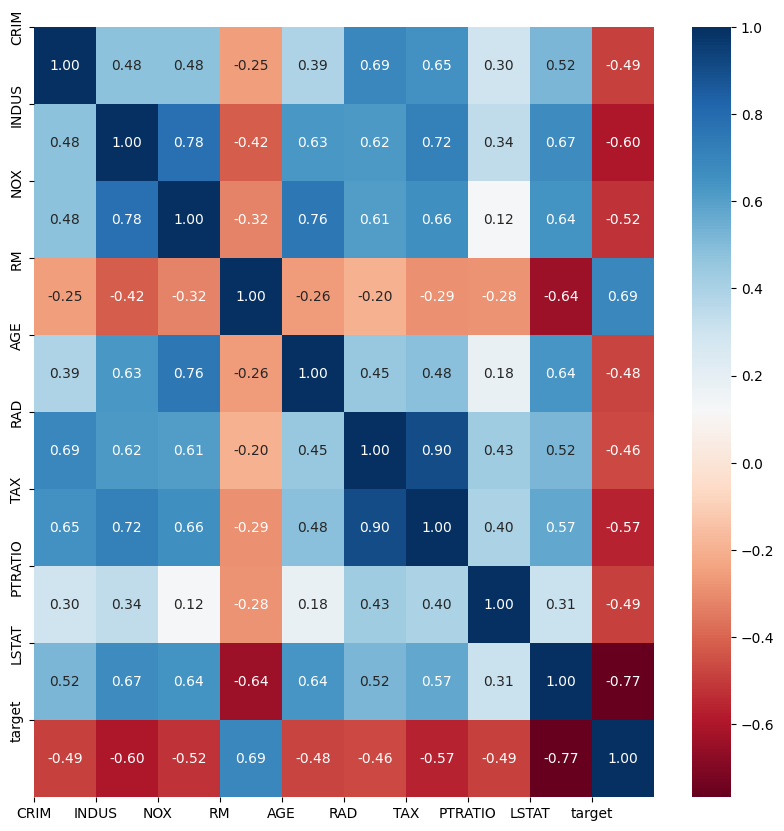

In [29]:
corr = _tmp_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [30]:
_tmp_df.drop('target', axis=1, inplace=True)

In [285]:
# X = dataset.iloc[:, 0:13].values
X_sel = dataset[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']].values

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size = 0.3, random_state = 25)
X_train = X_train[np.where(y_train == 50, False, True).ravel()]
y_train = y_train[np.where(y_train == 50, False, True).ravel()]

In [287]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (342, 9)
Shape of X_test:  (152, 9)
Shape of y_train:  (342, 1)
Shape of y_test (152, 1)


In [288]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [289]:
_tmp_df = pd.DataFrame(X_scaled)
_tmp_df.columns =['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [290]:
_tmp_test = pd.DataFrame(sc_X.transform(X_test))
_tmp_test.columns = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
_tmp_test.pprint()

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,-0.406,2.201,0.198,-0.400,0.730,-0.868,-1.305,0.290,0.233
1,0.213,1.071,0.214,-0.206,0.428,1.665,1.569,0.783,0.256
2,-0.387,-0.532,-0.534,0.251,-0.965,-0.523,-0.710,0.514,-0.941
3,2.309,1.071,1.187,-2.423,1.137,1.665,1.569,0.783,2.053
4,0.337,1.071,1.295,-0.256,0.590,1.665,1.569,0.783,0.218


In [280]:
for k in ['CRIM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']:
    _tmp_test[k] = np.log1p(_tmp_test[k])

In [281]:
for k in ['CRIM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']:
    _tmp_df[k] = np.log1p(_tmp_df[k])

In [291]:
X_train=_tmp_df
X_test=_tmp_test

In [292]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (342, 9)
Shape of X_test:  (152, 9)
Shape of y_train:  (342, 1)
Shape of y_test (152, 1)


In [293]:
# y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))
# sc_y.inverse_transform(model.predict(sc_X.transform(X_train)).reshape(-1,1))

In [302]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from xgboost import XGBRegressor, XGBRFRegressor
regressor_xgbrf = XGBRFRegressor(n_estimators = 500, random_state = 0)

# ('scalar', StandardScaler()),
# ('poly', PolynomialFeatures(degree=2)),
# ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
# ('model', XGBRFRegressor(n_estimators = 500, random_state = 0))
steps = [
    ('model', Lasso(alpha=0.1, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_scaled)

Pipeline(steps=[('model', Lasso(alpha=0.1, max_iter=3000))])

In [303]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [304]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
# lasso_pipe.predict(X_train)
y_pred_lasso_train = sc_y.inverse_transform(lasso_pipe.predict(sc_X.transform(X_train)).reshape(-1,1))
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = sc_y.inverse_transform(lasso_pipe.predict(sc_X.transform(X_test)).reshape(-1,1))
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.6985436355346397
R2_score (train):  0.18369999577582452
R2_score (test):  0.0333442277567112
RMSE:  8.534259339316113


In [305]:
Y_train_pred = sc_y.inverse_transform(lasso_pipe.predict(sc_X.transform(X_train)).reshape(-1,1))
Y_test_pred = sc_y.inverse_transform(lasso_pipe.predict(sc_X.transform(X_test)).reshape(-1,1))
error_mse_train = round(mean_squared_error(y_train, Y_train_pred), 2)
error_mse_test = round(mean_squared_error(y_test, Y_test_pred), 2)
print("El error cuadrático medio en train es: {}".format(error_mse_train))
print("El error cuadrático medio en test es: {}".format(error_mse_test))

El error cuadrático medio en train es: 52.33
El error cuadrático medio en test es: 72.83
